'''
<br><br>
@Author: Shivraj Yelave<br>
@Date: 3-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: Multiple Linear Regression Predict Aperent Temperature<br><br>
'''

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


### Load Dataset

In [8]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Admin\Documents\ML_programs\ML_Tasks\Regression\Simple_Linear_regression\weatherHistory.csv')

# Display the first few rows of the DataFrame
df.head()



,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Feature Selection

In [9]:
# Selecting features and the target variable
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X = df[features]
y = df['Apparent Temperature (C)']

In [10]:
# Check for missing values in the features and target
print(X.isnull().sum())
print(y.isnull().sum())

Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64
0


### Checkong for Outliers and Removing it

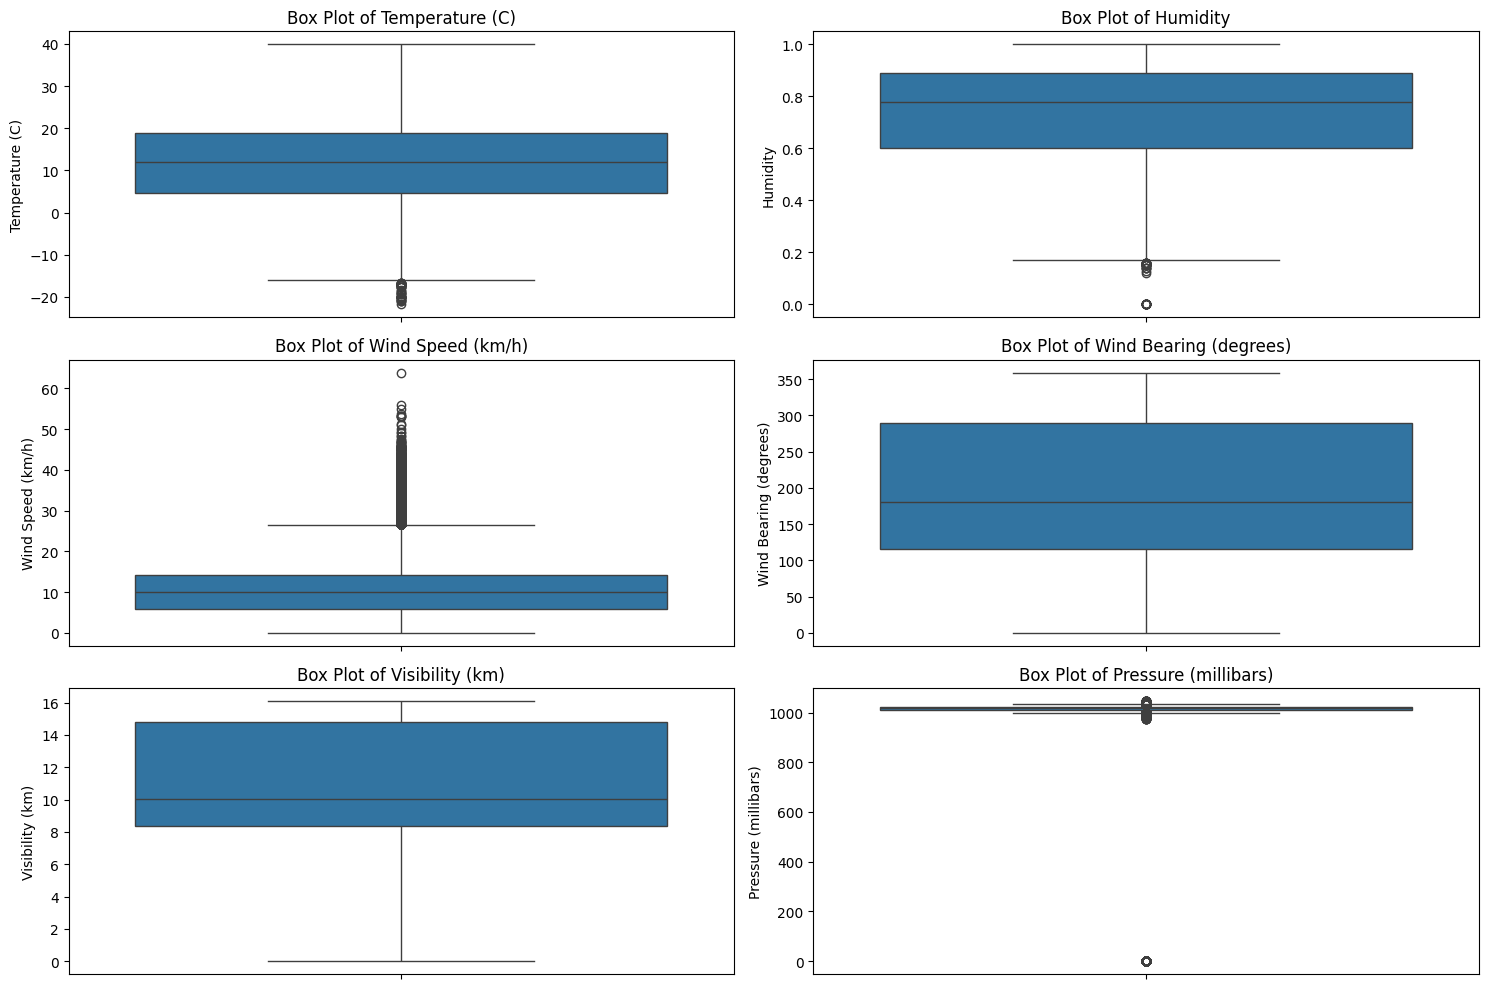

In [11]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each feature
    sns.boxplot(y=df[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

In [26]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(X))

# Set a threshold for Z-scores to identify outliers
threshold = 2

# Removing outliers
data_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[data_no_outliers.index]  # Keeping the corresponding target variable

# Display the number of records removed
print(f'Removed outliers, remaining records: {data_no_outliers.shape[0]}')

# Splitting the cleaned dataset into training and testing sets
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values

Removed outliers, remaining records: 80287


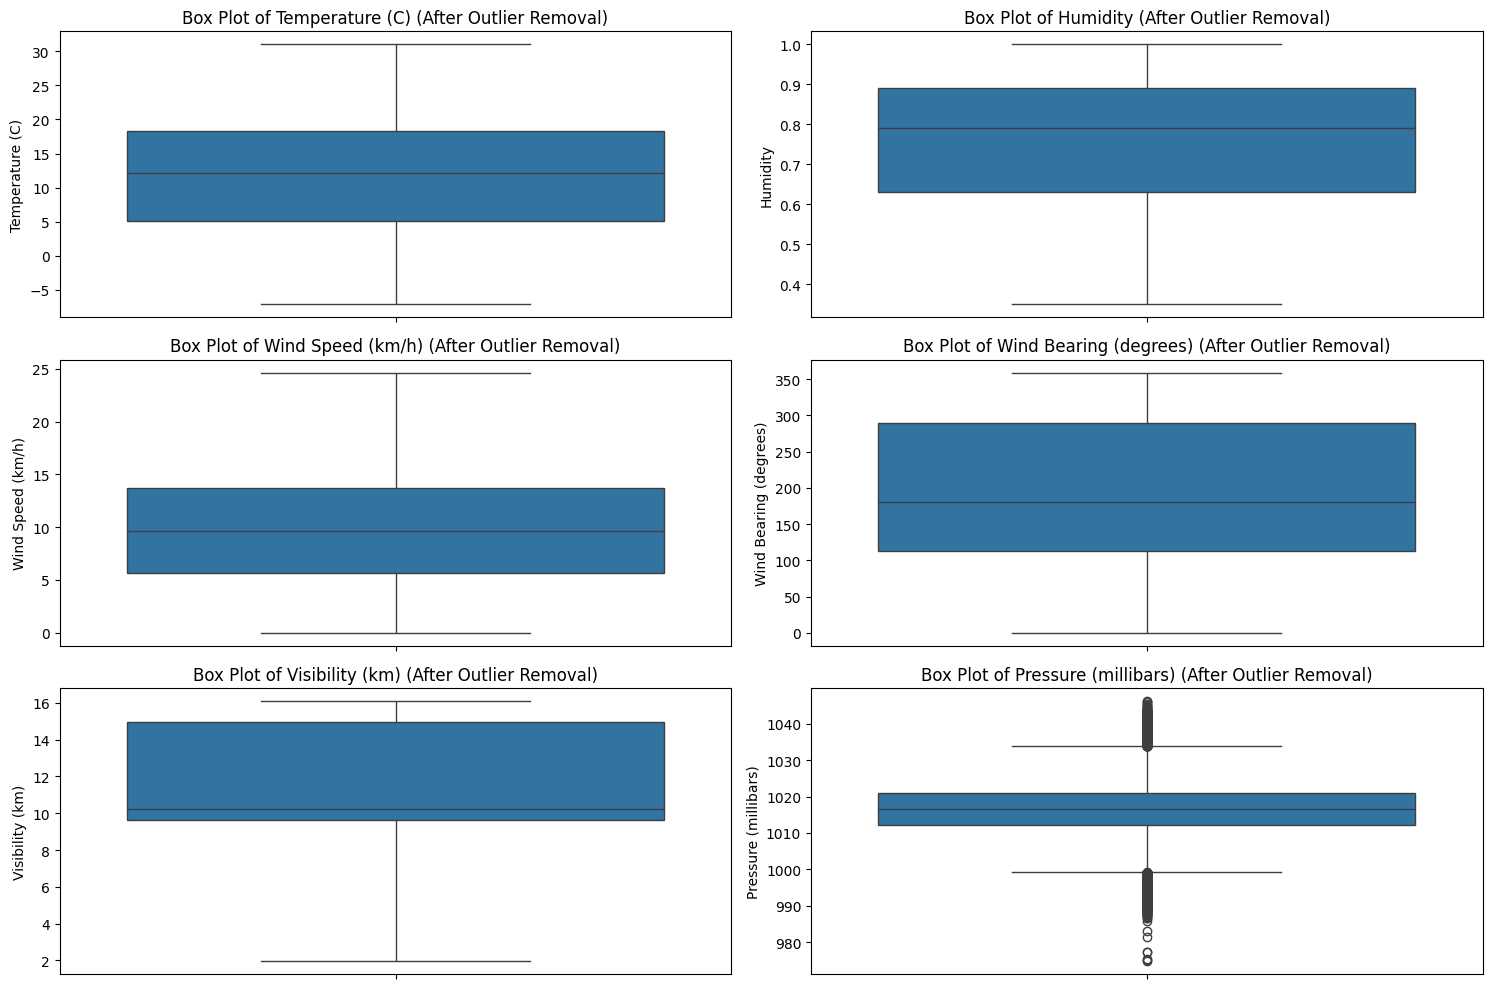

In [27]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each feature
    sns.boxplot(y=data_no_outliers[feature])  # Create a boxplot
    plt.title(f'Box Plot of {feature} (After Outlier Removal)')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

In [28]:
# Splitting the cleaned dataset into training and testing sets
X_clean = data_no_outliers.values
y_clean = y_no_outliers.values

### Checking Correlation

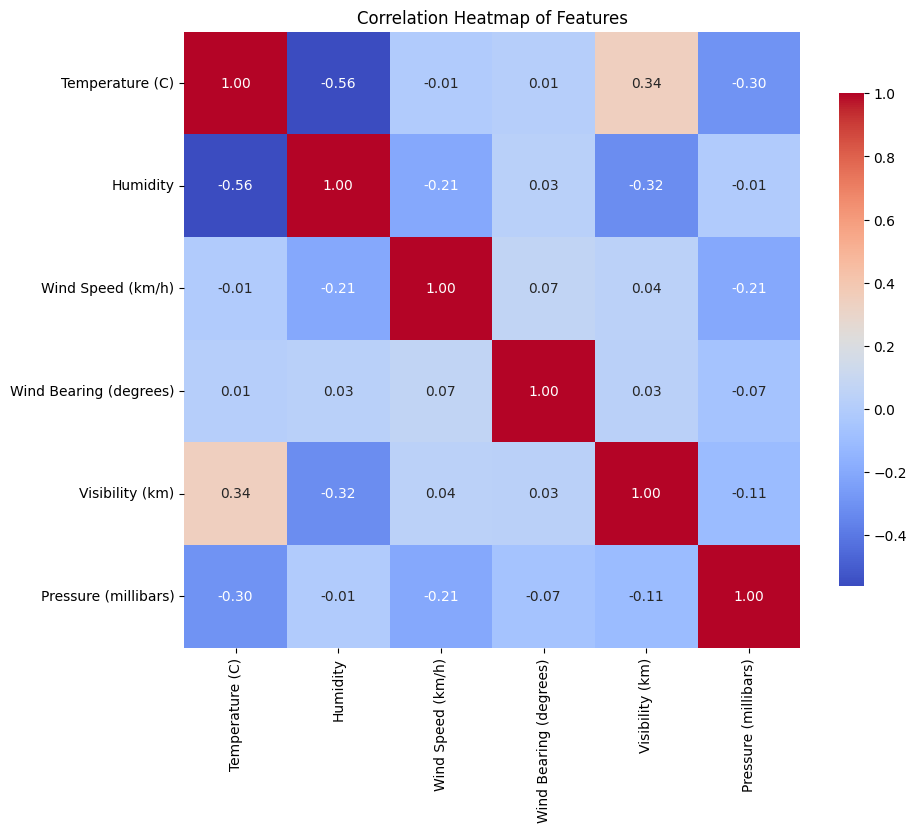

In [31]:
# Convert the cleaned data back to a DataFrame
X_clean = pd.DataFrame(X_clean, columns=features)

# Calculate the correlation matrix
correlation_matrix = X_clean.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()


### Spliting and Scaling

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_test_scaled

array([[-0.90796471,  0.58232851,  0.39460734, -0.2557565 , -1.31500951,
         0.39503483],
       [-0.22469857,  0.11049775, -1.21875816,  0.86091326,  1.33034404,
        -0.09352472],
       [ 1.19817889, -1.71784642, -0.43238757, -1.54923231, -0.23615406,
         0.83942325],
       ...,
       [-0.94164229,  1.2310958 ,  0.77183309,  0.96327465, -2.22987892,
        -2.38373126],
       [ 0.65869007, -1.71784642,  0.22050315, -0.97228627, -0.13689936,
        -0.34650487],
       [ 0.99481816, -1.48193104,  0.64996016, -0.64659092,  1.14909632,
        -0.37862933]])

### Model Selection

In [34]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

### Model Performance

Mean Squared Error: 0.8271385877912921
R^2 Score: 0.9912160190865391


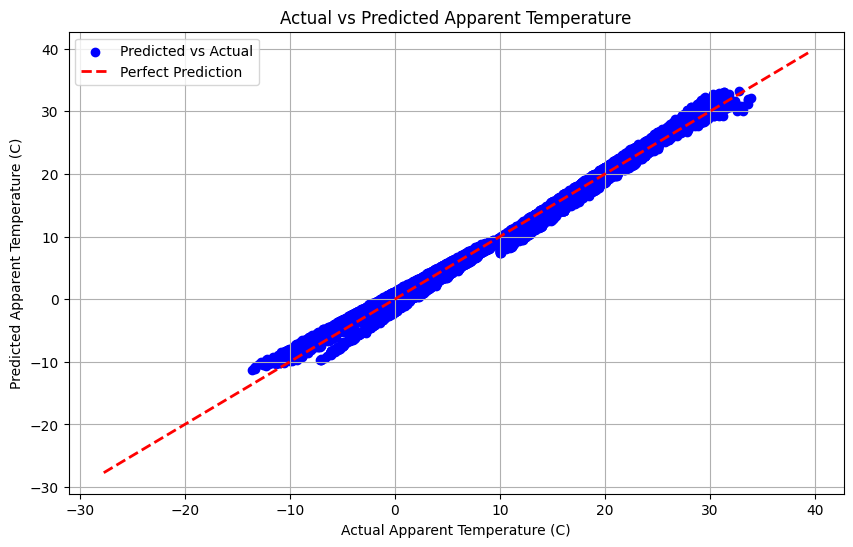

In [35]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results (actual vs predicted values)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()